In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

С помощью библиотеки pandas пердстваим датасет в виде таблицы и посмотим подробнее каждый столбец

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,event_id,date,cookie_id,session_id,event_type,domain_id
0,092656bc-da3a-42b2-87b2-bc7349cf1e91,2020-08-18 00:00:01.065710,9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f,f6ffb2a7-dfbd-40d7-ad25-a08c5a3a1323,read_block ...,a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a
1,4ee06cf5-24cc-478f-9acf-4e286516177f,2020-08-18 00:00:01.066429,9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f,f6ffb2a7-dfbd-40d7-ad25-a08c5a3a1323,read_block ...,a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a
2,ddc54ec1-46de-48ee-b906-9d8ce3d64b37,2020-08-18 00:00:02.582822,9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f,f6ffb2a7-dfbd-40d7-ad25-a08c5a3a1323,read_block ...,a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a
3,a34f5180-a533-4dd0-bb0c-a61bfb40b74a,2020-08-18 00:00:02.582836,9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f,f6ffb2a7-dfbd-40d7-ad25-a08c5a3a1323,read_block ...,a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a
4,962ae9a7-b768-46e2-b9bd-48dcdc78d0d9,2020-08-18 00:00:03.225834,b82ab5d5-228b-4f41-89c4-4eb74bfb4653,8645bfcd-c7be-4014-9f83-0c78be8d1f21,read_block ...,34308d56-1149-42a1-a0d9-5652c915ac9e


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124734 entries, 0 to 4124733
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   event_id    object
 1   date        object
 2   cookie_id   object
 3   session_id  object
 4   event_type  object
 5   domain_id   object
dtypes: object(6)
memory usage: 188.8+ MB


Посмотрим сколько уникальных значений есть в каждом столбце

In [4]:
for i in range(df.shape[1]):
    print('{0} {1}'.format(df.columns[i], len(df[df.columns[i]].unique())))

event_id 4124734
date 4116964
cookie_id 167122
session_id 240018
event_type 22
domain_id 9


Мы видимим, что столбцы event_type и domain_id содержат не так много различных значений, поэтому их можно закодировать с помощью one hot encoding
Но прежде чем мы это сделаем, нарисуем распределение этих признаков на графике. Для удобства раюоты фактаризуем признаки event_id, cookie_id, session_id, domain_id.

In [5]:
for col in ['event_id', 'cookie_id', 'session_id', 'domain_id']:
    df[col] = df[col].factorize()[0]
df.head()

,event_id,date,cookie_id,session_id,event_type,domain_id
0,0,2020-08-18 00:00:01.065710,0,0,read_block ...,0
1,1,2020-08-18 00:00:01.066429,0,0,read_block ...,0
2,2,2020-08-18 00:00:02.582822,0,0,read_block ...,0
3,3,2020-08-18 00:00:02.582836,0,0,read_block ...,0
4,4,2020-08-18 00:00:03.225834,1,1,read_block ...,1


Взглянем еще раз на значения к сттобце event_type. 

In [6]:
lab = list(map(lambda x: x.strip(), df.event_type.unique()))


In [7]:
list(enumerate(lab))

[(0, 'read_block'),
 (1, 'visit'),
 (2, 'change_resolution'),
 (3, 'filter_mortgage_change'),
 (4, 'click_scbform_button_callrequest'),
 (5, 'click'),
 (6, 'callback_exit'),
 (7, 'hover'),
 (8, 'Choose_flat'),
 (9, 'filter_change'),
 (10, 'choose_flat'),
 (11, 'change_slider'),
 (12, 'viber'),
 (13, 'submit_flat_applicaiton_click'),
 (14, 'callback_start'),
 (15, 'chat_start'),
 (16, 'whatsUp'),
 (17, 'chat_exit'),
 (18, 'clcik'),
 (19, 'taxi_start'),
 (20, 'taxi_exit'),
 (21, 'choose_dream_flat_click_podrobnee')]

Можно заметить, что значение 'Choose_flat' и 'choose_flat' имеют один и тот же смысл, поэтому оставим один вариант написаня. Аналогично для 'click' и 'clcik'.

In [8]:
df.loc[df['event_type']  == df.event_type.unique()[8], 'event_type'] = df.event_type.unique()[10]
df.loc[df['event_type']  == df.event_type.unique()[18], 'event_type'] = df.event_type.unique()[5]

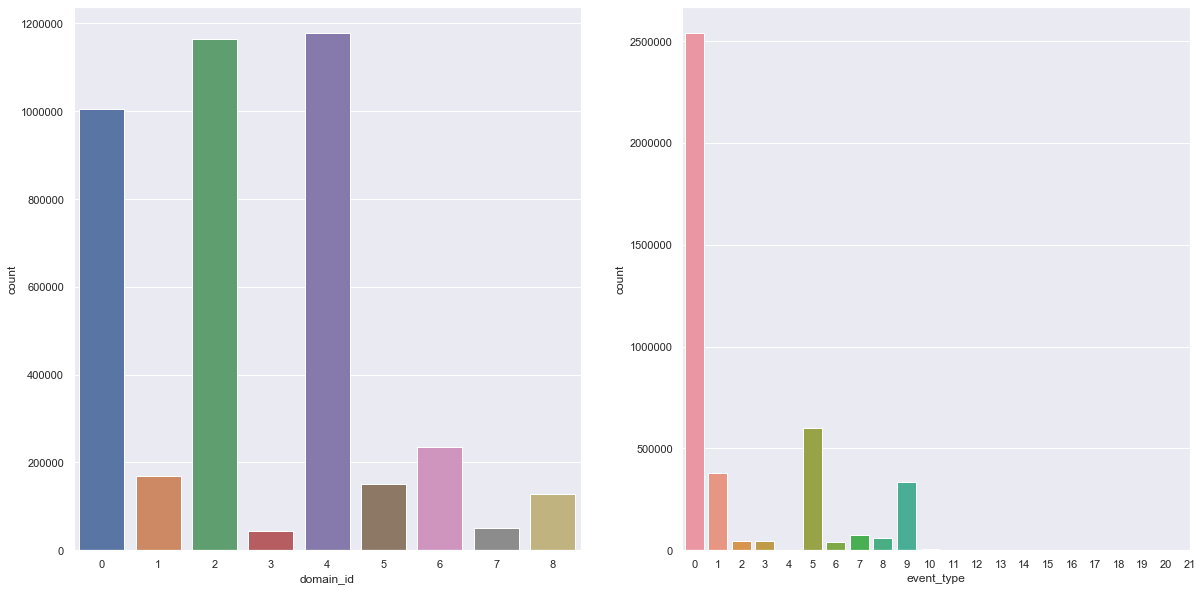

In [9]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
sns.countplot(df['domain_id'], ax = axs[0])
sns.countplot(df['event_type'], ax=axs[1])
plt.xticks(range(len(lab)), range(len(lab)))
print()

Из графика 2 видим, что самое частый тип события, которое пользователи совершают на сайте - это read_block, затем идет событие click, затем visit. 
Теперь рассмотрим статистику действий для каждого сайта отдельно.

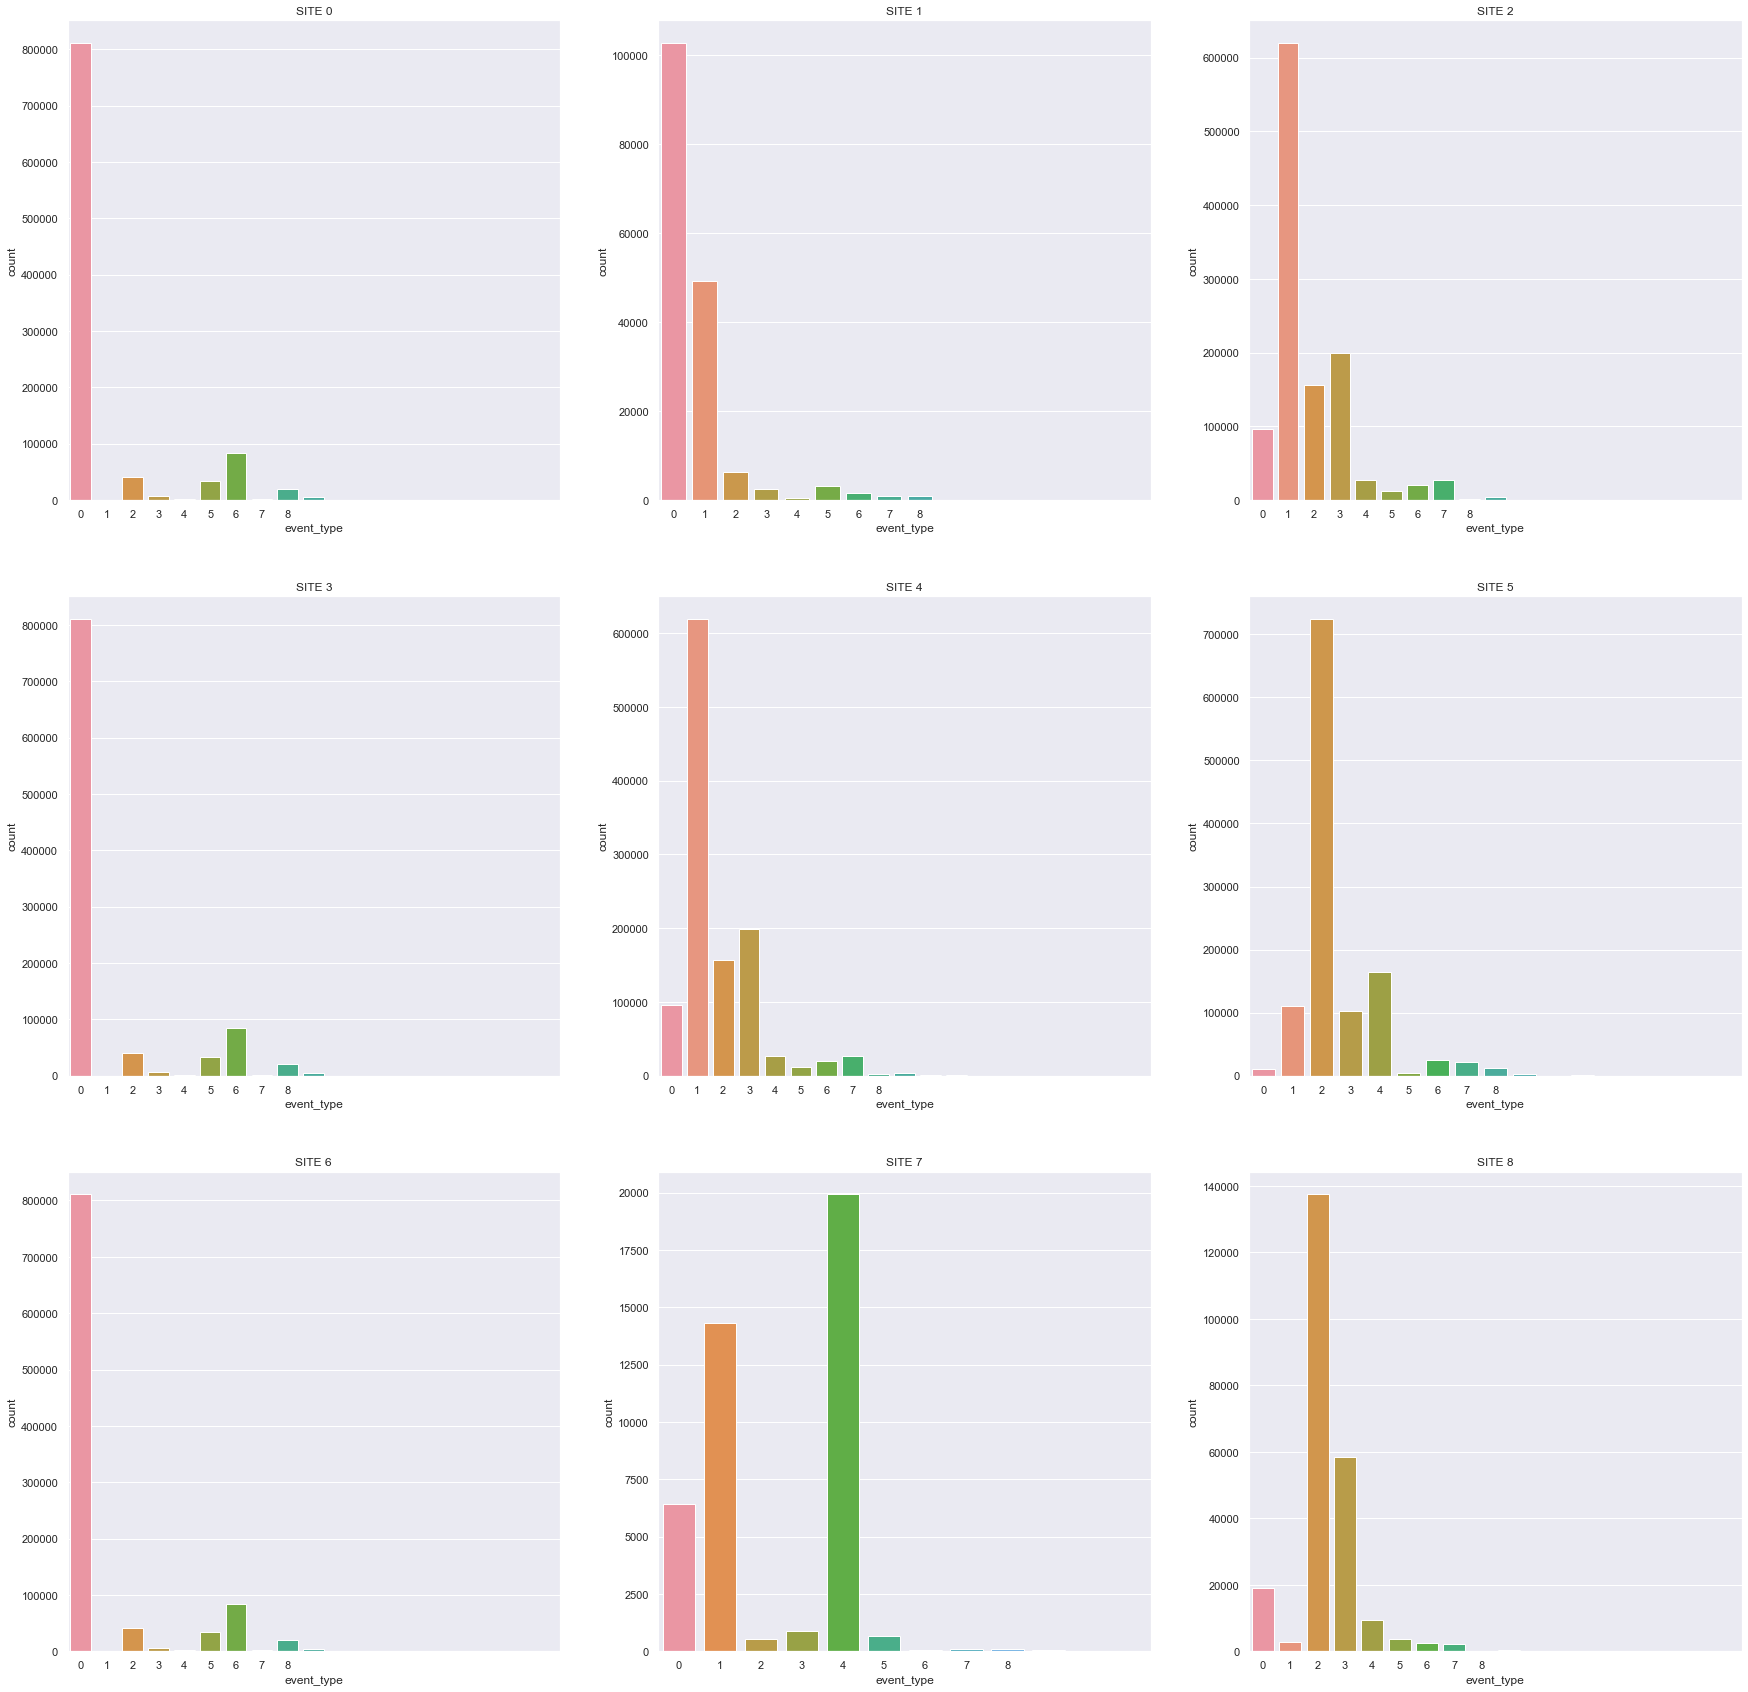

In [10]:
sites = []
for i in range(9):
    sites.append(df[df['domain_id'] == i])
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(30,30))
for i in range(3):
    for j in range(3):
        sns.countplot(sites[j+j*i].event_type, ax=axs[i][j])
        axs[i,j].set_title('SITE {}'.format(j+3*i))
plt.setp(axs, xticks=range(9), xticklabels=range(9))
print()

По графикам видим, что на сайтах под номерами 0, 1, 3, 6 пользователи совершают действия read_block, visit, change_resolution, filter_mortgage_change. При этом на остальных сайтах пользователи совершают действие click_scbform_button_callrequest, те они не просто "сидят" пассиано на сайте, а проявляют активность.

Можно заметить, что действия начиная с 7 на графиках вообще не видны. Те пользователи очень редко их совершают. Посмотрим насколько редко.

In [11]:
ev_types = df.event_type.unique()
for ev in ev_types:
    st = df[df['event_type'] == ev]
    print('{}    {}'.format(ev.strip(), st.shape[0]))

read_block    2541371
visit    380004
change_resolution    44262
filter_mortgage_change    44166
click_scbform_button_callrequest    1256
click    600393
callback_exit    38794
hover    74175
choose_flat    59314
filter_change    334760
change_slider    5410
viber    18
submit_flat_applicaiton_click    259
callback_start    141
chat_start    99
whatsUp    34
chat_exit    73
clcik    135
taxi_exit    28
choose_dream_flat_click_podrobnee    42


Теперь поработаем с столбцом date. Для начала приведем столбец к типу datetime. Затем для каждого пользователя вычислим длительность сессии.

In [12]:
df.date = pd.to_datetime(df.date)

In [13]:
des = df.groupby(['session_id']).agg({'date': ['max', 'min']}).reset_index()

In [14]:
qq = pd.DataFrame(des['date']['max'] - des['date']['min'])
qq['session_id'] = df.session_id.unique()
df = pd.merge(df,qq,on='session_id',how='left')

In [15]:
df = df.rename(columns={0: "session_duration"})
df.session_duration = df.session_duration.dt.total_seconds()
df.head()

,event_id,date,cookie_id,session_id,event_type,domain_id,session_duration
0,0,2020-08-18 00:00:01.065710,0,0,read_block ...,0,82554.317765
1,1,2020-08-18 00:00:01.066429,0,0,read_block ...,0,82554.317765
2,2,2020-08-18 00:00:02.582822,0,0,read_block ...,0,82554.317765
3,3,2020-08-18 00:00:02.582836,0,0,read_block ...,0,82554.317765
4,4,2020-08-18 00:00:03.225834,1,1,read_block ...,1,2231.924047


Применим one hot encoding к столбцам domain_id и event_type.

In [17]:
df = df.join(pd.get_dummies(df.event_type))

In [18]:
df.groupby(['cookie_id', 'domain_id']).sum().head(20)

event_id   session_id  session_duration  \
cookie_id domain_id                                                
0         0          592007101463  20375602748      5.482610e+10   
1         1              91065884      2248519      8.412037e+06   
2         0              56477919      2253052      1.559782e+05   
          1              15702732       626684      4.355237e+04   
          2              76744276      3106340      2.302418e+05   
          3              51781350      2054504      2.564781e+05   
          4              44356593      1801174      1.095384e+05   
          5              95476533      3815480      3.436615e+05   
          6              27728086      1098403      1.759740e+05   
          7              42312535      1691364      1.322330e+05   
          8              32386650      1318013      4.351731e+04   
3         3                   110            6      4.016131e+01   
4         4              31342154      1752422      6.777067e+03   
5         0              76286966      3042999      2.643987e+05   
          1              20134813       805862      7.752138e+04   
          2              83510112      3339232      3.880252e+05   
          3              59520720      2389171      1.766285e+05   
          4              46105841      1832360      2.165986e+05   
          5             136466744      5450669      4.823146e+05   
          6              44350370      1767437      1.860405e+05   

                     callback_exit                                                                                                                                                                                                                                               \
cookie_id domain_id                                                                                                                                                                                                                                                               
0         0                                                        1.0                                                                                                                                                                                                            
1         1                                                        0.0                                                                                                                                                                                                            
2         0                                                        0.0                                                                                                                                                                                                            
          1                                                        0.0                                                                                                                                                                                                            
          2                                                        0.0                                                                                                                                                                                                            
          3                                                        0.0                                                                                                                                                                                                            
          4                                                        0.0                                                                                                                                                                                                            
          5                                          

In [19]:
d = pd.get_dummies(df.domain_id).rename(columns={0: 'site0',
                                            1: 'site1',
                                            2: 'site2',
                                            3: 'site3',
                                            4: 'site4',
                                            5: 'site5',
                                            6: 'site6',
                                            7: 'site7',
                                            8: 'site8'})

In [20]:
df = df.join(d)

In [21]:
df

,event_id,date,cookie_id,session_id,event_type,domain_id,session_duration,callback_exit,callback_start,change_resolution,...,whatsUp,site0,site1,site2,site3,site4,site5,site6,site7,site8
0,0,2020-08-18 00:00:01.065710,0,0,read_block ...,0,82554.317765,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,2020-08-18 00:00:01.066429,0,0,read_block ...,0,82554.317765,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,2020-08-18 00:00:02.582822,0,0,read_block ...,0,82554.317765,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,2020-08-18 00:00:02.582836,0,0,read_block ...,0,82554.317765,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,2020-08-18 00:00:03.225834,1,1,read_block ...,1,2231.924047,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124729,4124729,2020-09-08 23:59:53.341022,167007,240016,read_block ...,0,99.016248,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4124730,4124730,2020-09-08 23:59:53.447630,167118,240013,hover ...,6,196.448968,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4124731,4124731,2020-09-08 23:59:53.534833,167118,240013,click ...,6,196.448968,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4124732,4124732,2020-09-08 23:59:53.795669,167007,240016,read_block ...,0,99.016248,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Таким образом получился дасет содержащий 4124734 строк. Я сгруппировала его по пользователям(cookie_id) и просуммировала значения в столбцах. Это было сделано по нескольким причинам. Во-первых когда я применяла алгоритмы машинного обучения к такому большому набору данных ноутбук не мог их обработать. Во-вторых на мой взгялд при таком подходе кластарезация будет работать эффективнее.

In [22]:
df = df.groupby('cookie_id').sum()

In [23]:
df

,event_id,session_id,domain_id,session_duration,callback_exit,callback_start,change_resolution,change_slider,chat_exit,chat_start,...,whatsUp,site0,site1,site2,site3,site4,site5,site6,site7,site8
cookie_id,,,,,,,,,,,,,,,,,,,,,
0,592007101463,20375602748,0,5.482610e+10,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,674858.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,91065884,2248519,951,8.412037e+06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,951.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,442966674,17765014,1726,1.491175e+06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,56.0,16.0,78.0,61.0,40.0,93.0,31.0,48.0,28.0
3,110,6,6,4.016131e+01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,31342154,1752422,52,6.777067e+03,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167117,20623134,1200040,25,8.834431e+02,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
167118,173236493,10080513,274,7.021231e+03,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,11.0
167119,12373934,720033,3,3.544522e+01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Уберем ненужные столбцы

In [24]:
df = df.drop(['event_id', 'domain_id', 'session_id'], axis=1)

In [25]:
df

,session_duration,callback_exit,callback_start,change_resolution,change_slider,chat_exit,chat_start,choose_dream_flat_click_podrobnee,choose_flat,clcik,...,whatsUp,site0,site1,site2,site3,site4,site5,site6,site7,site8
cookie_id,,,,,,,,,,,,,,,,,,,,,
0,5.482610e+10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,674858.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.412037e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,951.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.491175e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,56.0,16.0,78.0,61.0,40.0,93.0,31.0,48.0,28.0
3,4.016131e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,6.777067e+03,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167117,8.834431e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
167118,7.021231e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,11.0
167119,3.544522e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Подготовим данные для алгоритмов кластеризации

In [26]:
X = df.values
del df

array([[5.48261008e+10, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.41203654e+06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.49117466e+06, 0.00000000e+00, 0.00000000e+00, ...,
        3.10000000e+01, 4.80000000e+01, 2.80000000e+01],
       ...,
       [3.54452160e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.96283652e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20362405e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Приведем данные к стандартному виду

In [28]:
from sklearn import preprocessing

X = preprocessing.normalize(X)
X = preprocessing.scale(X)

Воспользуемся алгоритмом кластеризации KMeans. Для проверки эффективности разделения на классы, а также для подбора оптимального колличества кластеров используем метрику качетсва silhouette_score

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [39]:
range_n_clusters = list(range(3, 13, 2))

for n_clusters in range_n_clusters:
    cluster = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_lables = cluster.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_lables)
    print("For n_clusters{} The avg is {}".format(n_clusters, silhouette_avg))
    

For n_clusters3 The avg is 0.8710990856879598
For n_clusters5 The avg is 0.869862388035919
For n_clusters7 The avg is 0.8718974796144092
For n_clusters9 The avg is 0.8551558530456783
For n_clusters11 The avg is 0.8576061222111152


Лучший вариант показала модель с 7 кластарами. Выберем ее.